In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Loading dataset
data = pd.read_csv('C:\\Users\\laksh\\OneDrive\\Documents\\IBM Oct Internship\\Data with ML\\Project\\Dataset\\Air_Quality_Dataset.csv')

print(data.head())


   RecordID         AQI        PM10       PM2_5         NO2        SO2  \
0         1  187.270059  295.853039   13.038560    6.639263  66.161150   
1         2  475.357153  246.254703    9.984497   16.318326  90.499523   
2         3  365.996971   84.443191   23.111340   96.317811  17.875850   
3         4  299.329242   21.020609   14.273403   81.234403  48.323616   
4         5   78.009320   16.987667  152.111623  121.235461  90.866167   

           O3  Temperature   Humidity  WindSpeed  RespiratoryCases  \
0   54.624280     5.150335  84.424344   6.137755                 7   
1  169.621728     1.543378  46.851415   4.521422                10   
2    9.006794     1.169483  17.806977  11.157384                13   
3   93.161033    21.925276  99.473373  15.302500                 8   
4  241.795138     9.217517  24.906837  14.534733                 9   

   CardiovascularCases  HospitalAdmissions  HealthImpactScore  \
0                    5                   1          97.244041   
1   

In [4]:
# Checking for missing values
print(data.isnull().sum())

# Filling missing values or dropping them
data.fillna(method='ffill', inplace=True)  

# Encoding the target variable (health impact classes)
label_encoder = LabelEncoder()
data['HealthImpactClass'] = label_encoder.fit_transform(data['HealthImpactClass'])  

# Splitting the dataset into features and target variable
X = data.drop('HealthImpactClass', axis=1)  
y = data['HealthImpactClass']                

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64


C:\Users\laksh\AppData\Local\Temp\ipykernel_9068\3229645109.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Example: forward fill


In [5]:
# Model Initialization
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Model Training
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       953
           1       0.92      0.91      0.91       124
           2       0.78      0.81      0.80        53
           3       0.73      0.40      0.52        20
           4       0.00      0.00      0.00        13

    accuracy                           0.96      1163
   macro avg       0.68      0.62      0.64      1163
weighted avg       0.95      0.96      0.95      1163



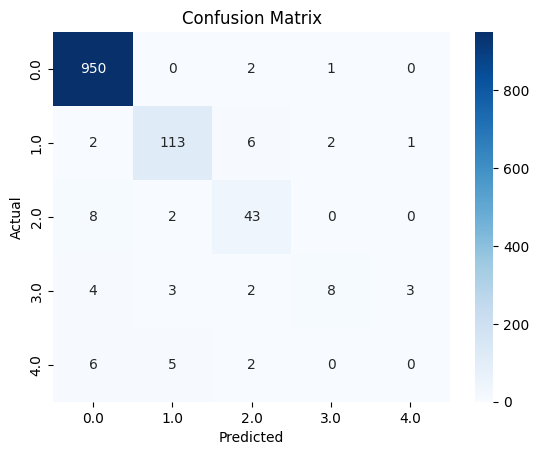

In [6]:
# Classification report
print(classification_report(y_test, predictions))

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


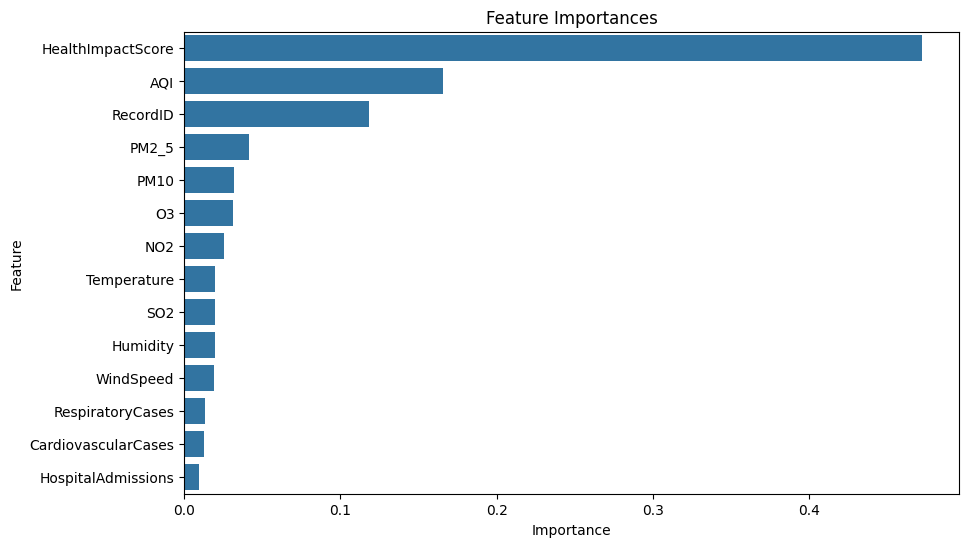

In [7]:
# Feature importances
importances = model.feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sorting by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importances')
plt.show()


In [8]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Creating a pipeline with scaling and SVM classifier
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_model.fit(X_train, y_train)

# Predictions and Evaluations
svm_predictions = svm_model.predict(X_test)
print(classification_report(y_test, svm_predictions))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       953
           1       0.87      0.87      0.87       124
           2       0.72      0.74      0.73        53
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        13

    accuracy                           0.94      1163
   macro avg       0.51      0.52      0.52      1163
weighted avg       0.91      0.94      0.93      1163



C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [9]:
from xgboost import XGBClassifier

# Model Initialisation
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation
xgb_predictions = xgb_model.predict(X_test)
print(classification_report(y_test, xgb_predictions))


C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:17:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       953
           1       0.93      0.90      0.91       124
           2       0.77      0.75      0.76        53
           3       0.48      0.50      0.49        20
           4       0.18      0.15      0.17        13

    accuracy                           0.96      1163
   macro avg       0.67      0.66      0.66      1163
weighted avg       0.96      0.96      0.96      1163

